# 03.4 — Pandas: Datetime Conversion, Resampling & Rolling Windows

This notebook covers datetime handling in Pandas:

- Converting text to datetime (`pd.to_datetime()`)
- Extracting date parts (`.dt.year`, `.dt.month`, `.dt.day_name()`)
- Resampling time series (`.resample('M')`, `.resample('D')`)

We'll create a demo time series and also show how to convert real columns when available. This notebook is Google Colab-ready.

---

In [2]:
import pandas as pd
sample = pd.to_datetime(pd.Series(['2021-07-04','2022-12-25','2023-01-01']))
print(sample.dt.year)
print(sample.dt.month)
print(sample.dt.day_name())
print(sample.dt.weekday)
print(sample.dt.day)

0    2021
1    2022
2    2023
dtype: int32
0     7
1    12
2     1
dtype: int32
0    Sunday
1    Sunday
2    Sunday
dtype: object
0    6
1    6
2    6
dtype: int32
0     4
1    25
2     1
dtype: int32


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')


# Load dataset
path = '/content/drive/My Drive/EDA/eda_course_dataset_100rows.csv'

df = pd.read_csv(path, parse_dates=['order_date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Datetime Conversion

- Use `pd.to_datetime()` to convert strings to `datetime64[ns]`

/tmp/ipython-input-4268464318.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_ts['total_amount'].resample('M').sum()


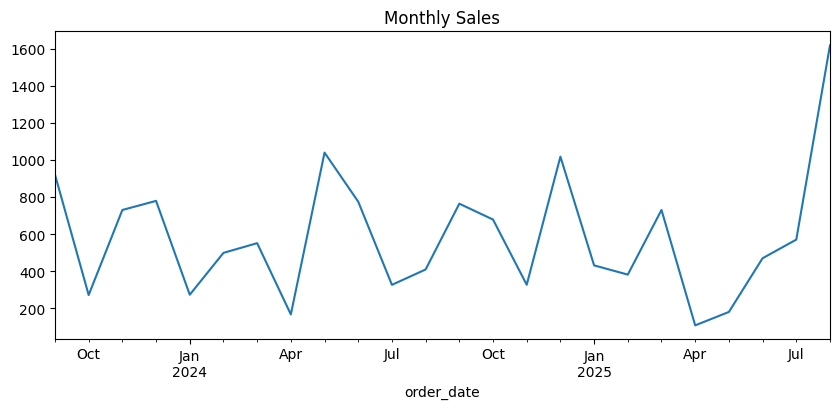

,total_amount
order_date,
2023-09-30,920.90
2023-10-31,271.08
2023-11-30,729.95
2023-12-31,778.99
2024-01-31,272.67


In [11]:
df_ts = df.set_index('order_date')
monthly = df_ts['total_amount'].resample('M').sum()
plt.figure(figsize=(10,4))
monthly.plot()
plt.title('Monthly Sales')
plt.show()
display(monthly.head())